In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")

 Data loaded successfully for Rapid Bucureşti
 Analyzing 1 season record(s)

 COMPLETE TEAM STYLE ANALYSIS - RAPID BUCUREŞTI
 ADVANCED ATTACKING STYLE ANALYSIS

 GOAL THREAT & CREATIVITY:
Goals per match: 1.05 (League avg: 1.06)
Expected Goals: 1.210 (League avg: 1.152)
Goal conversion rate: 9.2% (League avg: 9.8%)
Shots per match: 10.8 (League avg: 10.5)
Shots on target %: 33.4% (League avg: 34.5%)

 CREATIVE PASSING:
Key passes per match: 2.5 (League avg: 2.4)
Through passes per match: 4.4 (League avg: 3.8)
Shot assists per match: 6.5 (League avg: 6.3)
Smart passes success %: 34.7% (League avg: 43.1%)

 ATTACKING MOVEMENT:
Progressive runs per match: 13.9 (League avg: 12.2)
Touches in box per match: 15.9 (League avg: 14.5)
Successful dribbles per match: 15.0 (League avg: 13.7)
Dribble success rate: 73.8% (League avg: 70.9%)

 WIDTH & CROSSING:
Crosses per match: 13.4 (League avg: 13.3)
Cross success rate: 31.5% (League avg: 31.7%)
Passes to final third: 49.2 (League avg: 49.6)

 ATTA

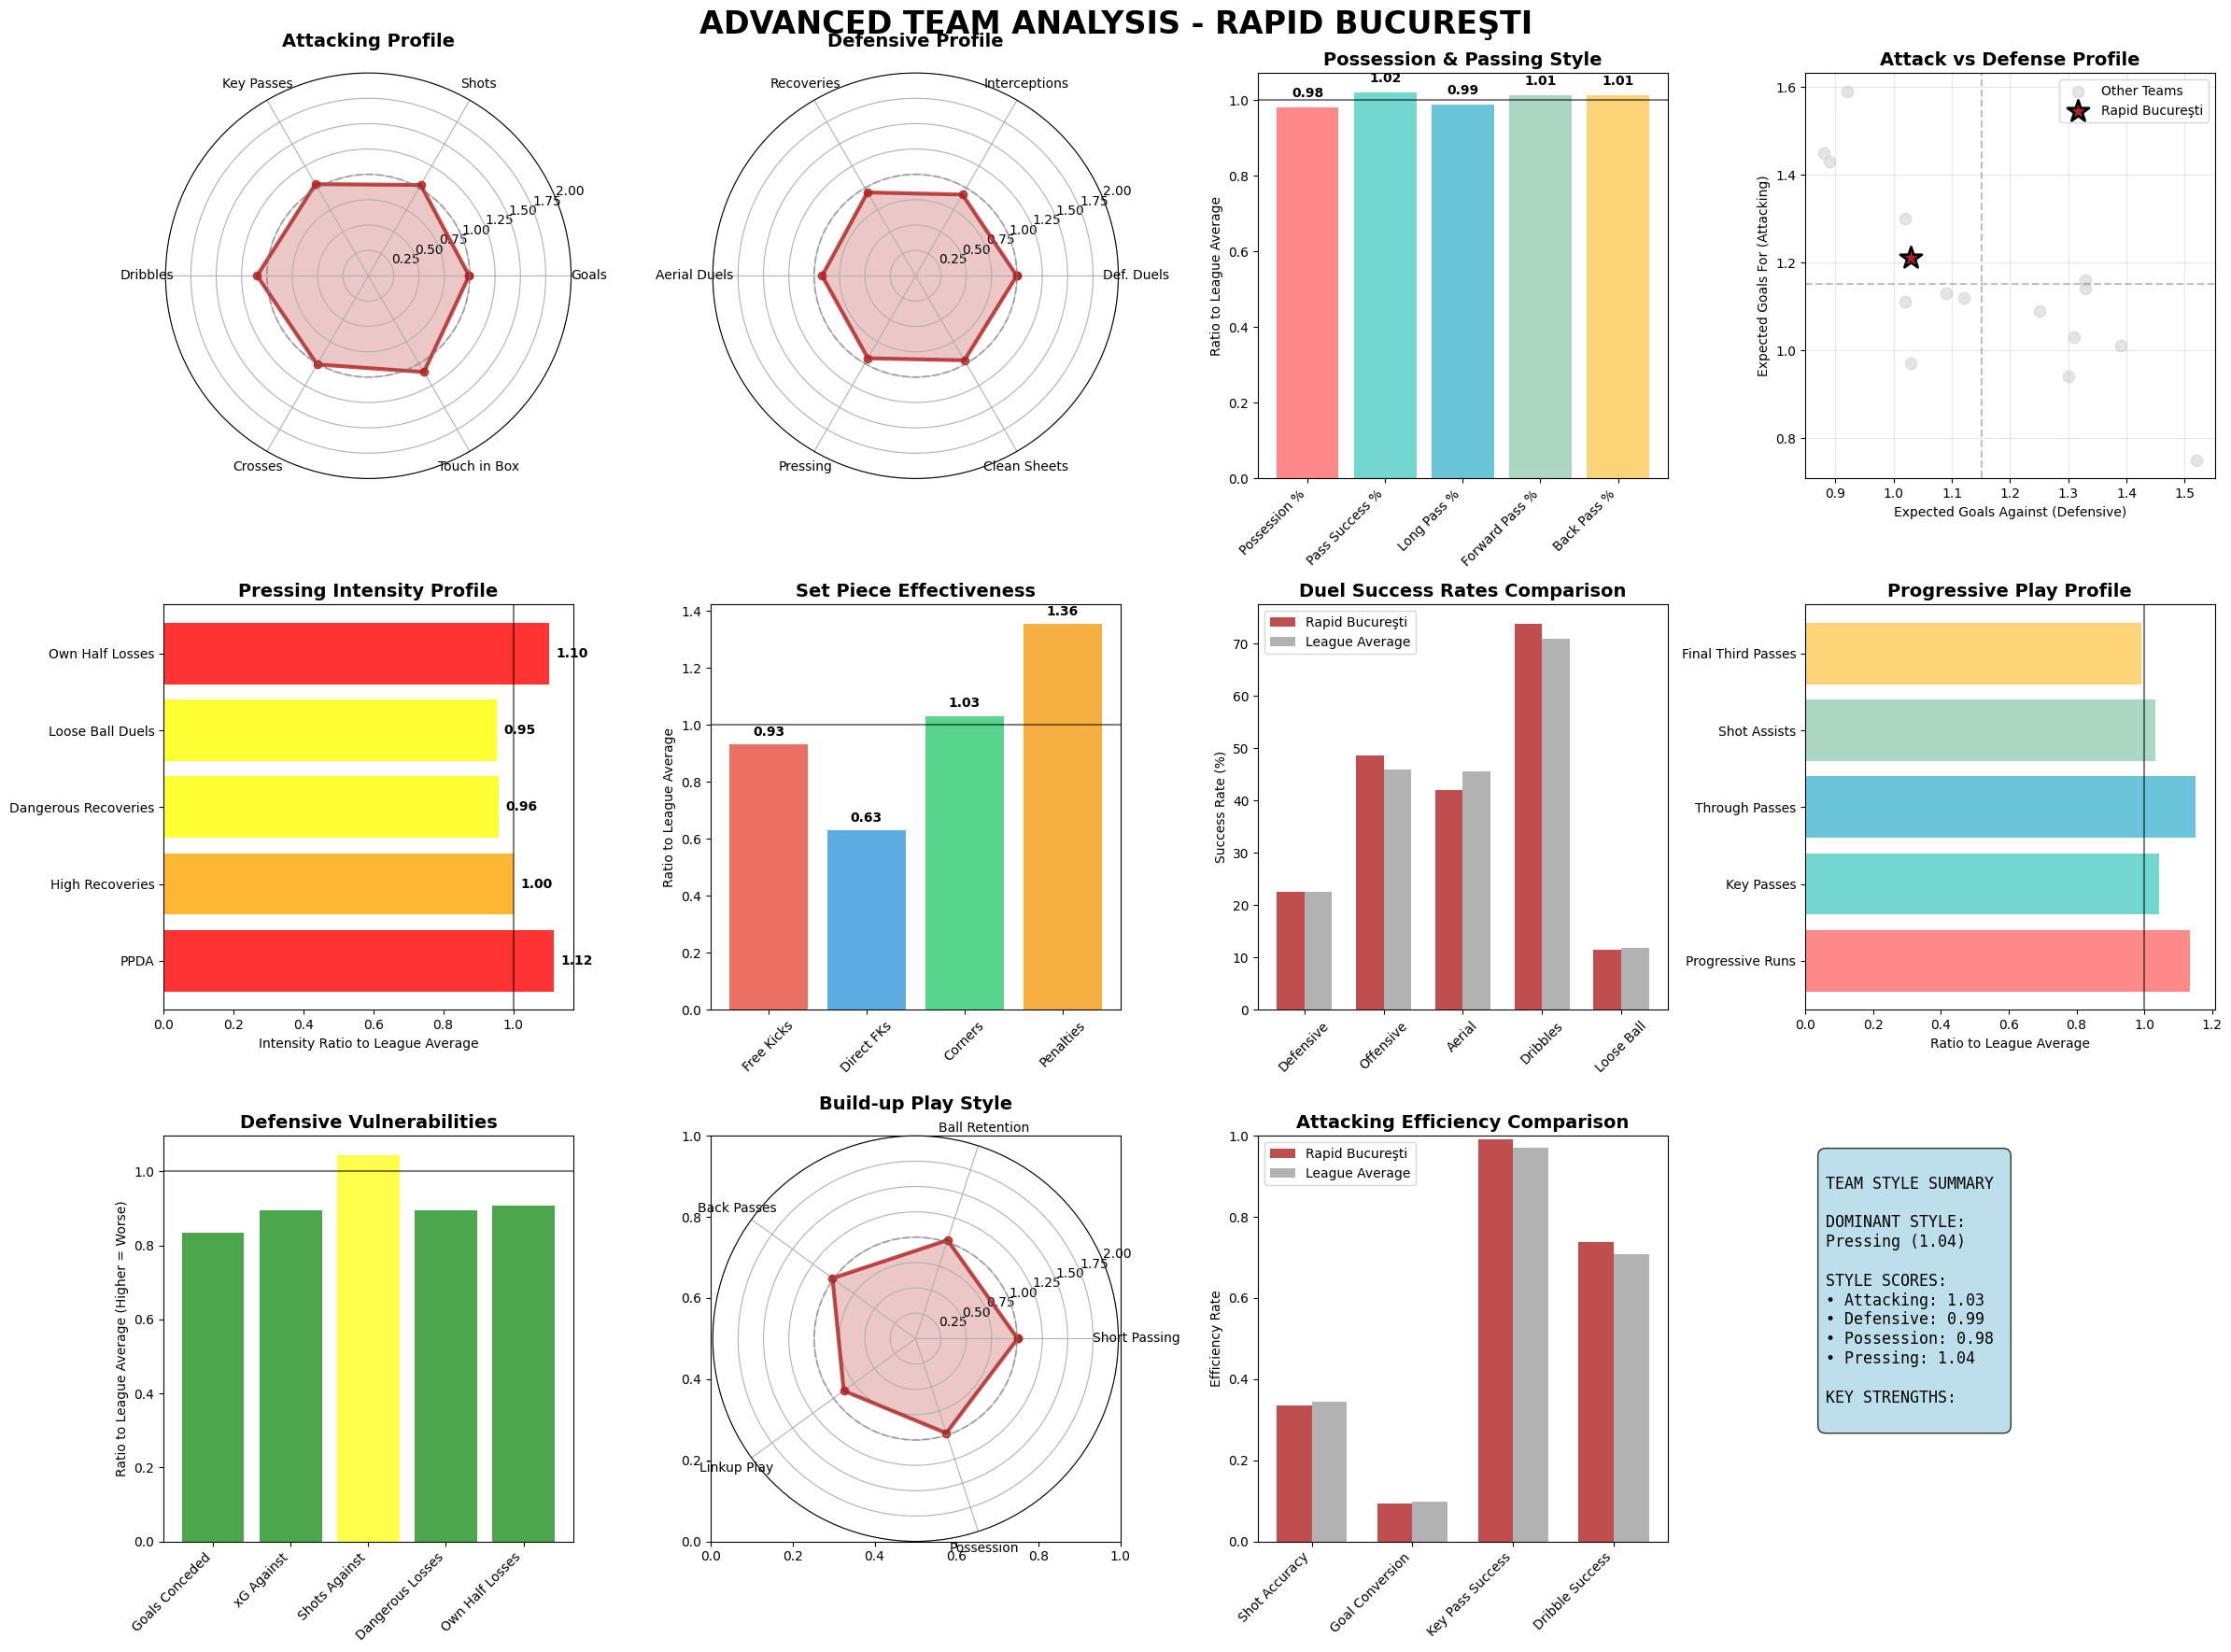


 CENTRE-BACK SCOUTING VIZUALIZATION


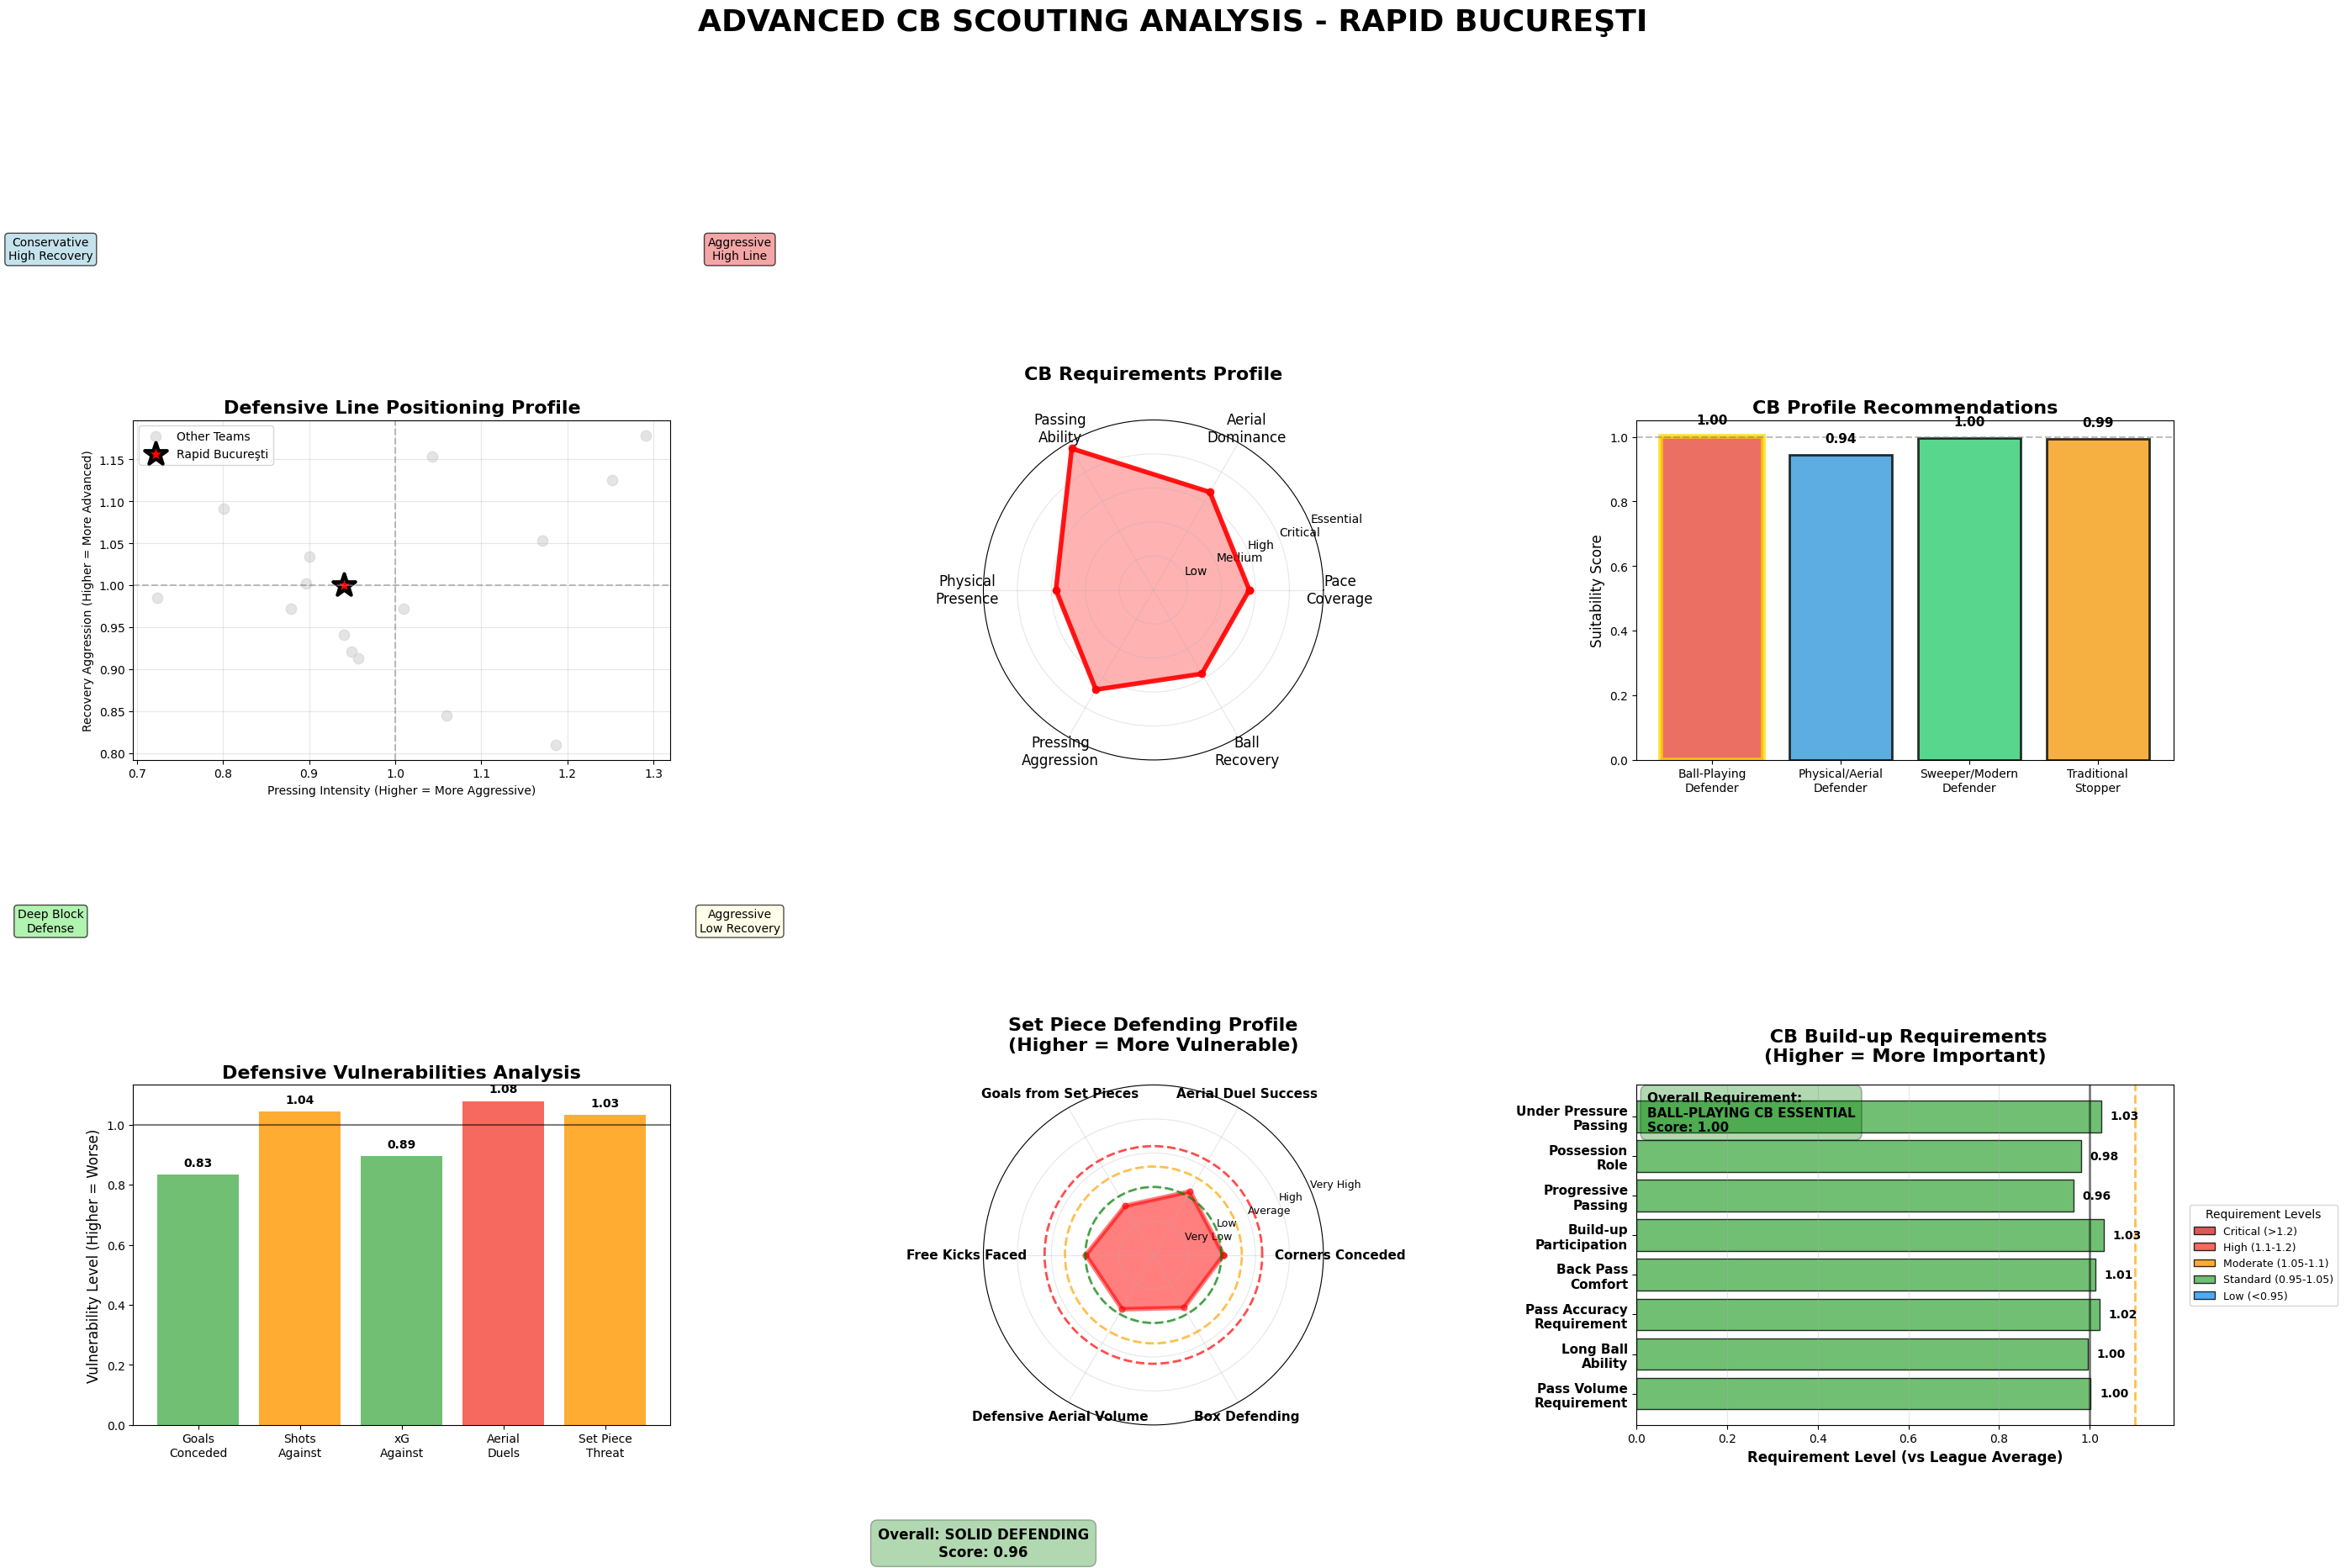


 OVERALL TEAM PROFILE SUMMARY

 STYLE INTENSITY SCORES:
Attacking Intensity: 1.03 (Moderate)
Defensive Intensity: 0.94 (Moderate)
Possession Control: 0.98 (Moderate)
Physical Approach: 0.96 (Moderate)

 PRIMARY PLAYING STYLE:
✓ BALANCED/ADAPTABLE
  Well-rounded approach without extreme tendencies

 KEY TEAM STRENGTHS:
• Balanced across all areas

 AREAS FOR IMPROVEMENT:
• No significant weaknesses identified

 TACTICAL RECOMMENDATIONS:
• Continue developing balanced approach
• Identify and strengthen primary tactical identity
• Maintain flexibility to adapt to opponents

✅ ANALYSIS COMPLETED SUCCESSFULLY

🎉 Analysis complete! Use the 'analyzer' object for further investigation.
📊 Results stored in 'results' dictionary with keys: 'attacking', 'defensive', 'possession', 'physicality'


In [96]:
class RapidBucurestiAnalyzer:
    def __init__(self, csv_file, team_name="Rapid Bucureşti"):
        """Initialize the analyzer with the CSV file and team name"""
        self.df = pd.read_csv(csv_file)
        self.team_name = team_name
        self.team_data = None
        self.league_avg = None
        self.prepare_data()

    def prepare_data(self):
        """Prepare and clean the data for analysis"""
        # Filter for the specified team
        self.team_data = self.df[self.df['team.name'] == self.team_name].copy()

        if self.team_data.empty:
            # Try partial matching
            possible_matches = self.df[self.df['team.name'].str.contains(self.team_name, case=False, na=False)]
            if not possible_matches.empty:
                self.team_data = possible_matches.copy()
                self.team_name = possible_matches['team.name'].iloc[0]
            else:
                print("Available teams:", self.df['team.name'].unique())
                raise ValueError(f"{self.team_name} not found in data")

        # Identify numeric columns (exclude text/ID columns)
        text_columns = ['team.name', 'teamId', 'competitionId', 'seasonId']
        numeric_columns = [col for col in self.df.columns if col not in text_columns]

        # Calculate league averages using only numeric columns
        self.league_avg = self.df[numeric_columns].mean()

        print(f" Data loaded successfully for {self.team_name}")
        print(f" Analyzing {len(self.team_data)} season record(s)")

    def get_numeric_columns(self):
        """Get numeric columns for analysis"""
        text_columns = ['team.name', 'teamId', 'competitionId', 'seasonId']
        return [col for col in self.df.columns if col not in text_columns]

    def attacking_style_analysis(self):
        """Advanced attacking patterns and style analysis"""
        team_avg = self.team_data[self.get_numeric_columns()].mean()

        print("=" * 70)
        print(" ADVANCED ATTACKING STYLE ANALYSIS")
        print("=" * 70)

        # Goal threat and creativity
        print(f"\n GOAL THREAT & CREATIVITY:")
        print(f"Goals per match: {team_avg['average.goals']:.2f} (League avg: {self.league_avg['average.goals']:.2f})")
        print(f"Expected Goals: {team_avg['average.xgShot']:.3f} (League avg: {self.league_avg['average.xgShot']:.3f})")
        print(f"Goal conversion rate: {team_avg['percent.goalConversion']:.1f}% (League avg: {self.league_avg['percent.goalConversion']:.1f}%)")
        print(f"Shots per match: {team_avg['average.shots']:.1f} (League avg: {self.league_avg['average.shots']:.1f})")
        print(f"Shots on target %: {team_avg['percent.shotsOnTarget']:.1f}% (League avg: {self.league_avg['percent.shotsOnTarget']:.1f}%)")

        # Creative passing
        print(f"\n CREATIVE PASSING:")
        print(f"Key passes per match: {team_avg['average.keyPasses']:.1f} (League avg: {self.league_avg['average.keyPasses']:.1f})")
        print(f"Through passes per match: {team_avg['average.throughPasses']:.1f} (League avg: {self.league_avg['average.throughPasses']:.1f})")
        print(f"Shot assists per match: {team_avg['average.shotAssists']:.1f} (League avg: {self.league_avg['average.shotAssists']:.1f})")
        print(f"Smart passes success %: {team_avg['percent.successfulSmartPasses']:.1f}% (League avg: {self.league_avg['percent.successfulSmartPasses']:.1f}%)")

        # Attacking movement and progression
        print(f"\n ATTACKING MOVEMENT:")
        print(f"Progressive runs per match: {team_avg['average.progressiveRun']:.1f} (League avg: {self.league_avg['average.progressiveRun']:.1f})")
        print(f"Touches in box per match: {team_avg['average.touchInBox']:.1f} (League avg: {self.league_avg['average.touchInBox']:.1f})")
        print(f"Successful dribbles per match: {team_avg['average.successfulDribbles']:.1f} (League avg: {self.league_avg['average.successfulDribbles']:.1f})")
        print(f"Dribble success rate: {team_avg['percent.successfulDribbles']:.1f}% (League avg: {self.league_avg['percent.successfulDribbles']:.1f}%)")

        # Crossing and width
        print(f"\n WIDTH & CROSSING:")
        print(f"Crosses per match: {team_avg['average.crosses']:.1f} (League avg: {self.league_avg['average.crosses']:.1f})")
        print(f"Cross success rate: {team_avg['percent.successfulCrosses']:.1f}% (League avg: {self.league_avg['percent.successfulCrosses']:.1f}%)")
        print(f"Passes to final third: {team_avg['average.passesToFinalThird']:.1f} (League avg: {self.league_avg['average.passesToFinalThird']:.1f})")

        # ATTACKING STYLE INDICATORS
        self._attacking_style_indicators(team_avg)

        return team_avg

    def _attacking_style_indicators(self, team_avg):
        """Analyze attacking style patterns and provide interpretations"""
        print(f"\n ATTACKING STYLE INDICATORS:")

        # Creativity indicators
        creativity_ratio = (team_avg['average.keyPasses'] + team_avg['average.throughPasses']) / (self.league_avg['average.keyPasses'] + self.league_avg['average.throughPasses'])
        finishing_ratio = team_avg['average.shots'] / self.league_avg['average.shots']
        shot_quality_ratio = team_avg['average.xgShot'] / self.league_avg['average.xgShot']
        box_presence_ratio = team_avg['average.touchInBox'] / self.league_avg['average.touchInBox']
        crossing_reliance = team_avg['average.crosses'] / self.league_avg['average.crosses']

        # Creativity assessment
        if creativity_ratio > 1.05:
            print("✓ HIGH CREATIVITY - Generates many dangerous situations through passing")
        elif creativity_ratio < 0.95:
            print("• LIMITED CREATIVITY - More direct/counter-attacking approach")
        else:
            print("• MODERATE CREATIVITY - Balanced creative output")

        # Shot volume assessment
        if finishing_ratio > 1.05:
            print("✓ SHOT-HEAVY APPROACH - Takes many attempts, high volume shooting")
        elif finishing_ratio < 0.95:
            print("• SELECTIVE SHOOTING - Waits for clear chances, quality over quantity")
        else:
            print("• BALANCED SHOT SELECTION - Average shooting frequency")

        # Shot quality assessment
        if shot_quality_ratio > 1.05:
            print("✓ HIGH SHOT QUALITY - Creates good scoring opportunities")
        elif shot_quality_ratio < 0.95:
            print("- LOWER SHOT QUALITY - May struggle to create clear chances")
        else:
            print("• AVERAGE SHOT QUALITY - Standard chance creation")

        # Box presence assessment
        if box_presence_ratio > 1.05:
            print("✓ STRONG BOX PRESENCE - Frequently gets into dangerous areas")
        elif box_presence_ratio < 0.95:
            print("- LIMITED BOX PRESENCE - May struggle with final third penetration")
        else:
            print("• MODERATE BOX PRESENCE - Standard final third activity")

        # Width and crossing style
        if crossing_reliance > 1.05:
            print("✓ WIDTH-FOCUSED ATTACK - Heavy reliance on crossing and wide play")
        elif crossing_reliance < 0.95:
            print("• CENTRAL ATTACK - Prefers through the middle approach")
        else:
            print("• BALANCED WIDTH - Mix of central and wide attacking")

        # Overall attacking classification
        print(f"\n ATTACKING CLASSIFICATION:")
        if creativity_ratio > 1.1 and finishing_ratio > 1.1:
            print("CREATIVE & PROLIFIC - High chance creation with volume shooting")
        elif creativity_ratio > 1.1 and finishing_ratio < 0.9:
            print("CREATIVE & SELECTIVE - Good chance creation, clinical finishing")
        elif creativity_ratio < 0.9 and finishing_ratio > 1.1:
            print("DIRECT & AGGRESSIVE - Limited buildup but high shot volume")
        elif box_presence_ratio > 1.2:
            print("PENETRATIVE ATTACK - Strong at getting into dangerous positions")
        else:
            print("BALANCED ATTACK - Well-rounded offensive approach")

    def defensive_style_analysis(self):
        """Advanced defensive patterns and pressing analysis"""
        team_avg = self.team_data[self.get_numeric_columns()].mean()

        print("\n" + "=" * 70)
        print(" ADVANCED DEFENSIVE STYLE ANALYSIS")
        print("=" * 70)

        # Defensive solidity
        print(f"\n DEFENSIVE SOLIDITY:")
        print(f"Goals conceded per match: {team_avg['average.concededGoals']:.2f} (League avg: {self.league_avg['average.concededGoals']:.2f})")
        print(f"Expected goals against: {team_avg['average.xgShotAgainst']:.2f} (League avg: {self.league_avg['average.xgShotAgainst']:.2f})")
        print(f"Shots against per match: {team_avg['average.shotsAgainst']:.1f} (League avg: {self.league_avg['average.shotsAgainst']:.1f})")
        print(f"Defensive efficiency (xGA - Goals Conceded): {team_avg['average.xgShotAgainst'] - team_avg['average.concededGoals']:+.2f}")
        print(f"Clean sheets: {team_avg['total.cleanSheets']:.0f} matches")

        # Pressing and duels
        print(f"\n PRESSING & DUELS:")
        print(f"Defensive duels per match: {team_avg['total.defensiveDuels']:.1f} (League avg: {self.league_avg['total.defensiveDuels']:.1f})")
        print(f"Defensive duel success: {team_avg['percent.defensiveDuelsWon']:.1f}% (League avg: {self.league_avg['percent.defensiveDuelsWon']:.1f}%)")
        print(f"Ball recoveries per match: {team_avg['average.ballRecoveries']:.1f} (League avg: {self.league_avg['average.ballRecoveries']:.1f})")
        print(f"Opponent half recoveries: {team_avg['average.opponentHalfRecoveries']:.1f} (League avg: {self.league_avg['average.opponentHalfRecoveries']:.1f})")
        print(f"Dangerous opp. half recoveries: {team_avg['average.dangerousOpponentHalfRecoveries']:.1f} (League avg: {self.league_avg['average.dangerousOpponentHalfRecoveries']:.1f})")
        print(f"Ball loss danger: {team_avg['total.dangerousOwnHalfLosses']:.1f} (League avg: {self.league_avg['total.dangerousOwnHalfLosses']:.1f})")

        # Pressing intensity
        print(f"\n PRESSING INTENSITY:")
        print(f"Pressing duels per match: {team_avg['total.pressingDuels']:.1f} (League avg: {self.league_avg['total.pressingDuels']:.1f})")
        print(f"Pressing duel success: {team_avg['total.pressingDuelsWon']:.1f}% (League avg: {self.league_avg['total.pressingDuelsWon']:.1f}%)")
        print(f"Loose ball duels per match: {team_avg['average.looseBallDuels']:.1f} (League avg: {self.league_avg['average.looseBallDuels']:.1f})")
        print(f"Interceptions per match: {team_avg['average.interceptions']:.1f} (League avg: {self.league_avg['average.interceptions']:.1f})")
        print(f"Passes per defensive action: {team_avg['total.ppda']:.1f} (League avg: {self.league_avg['total.ppda']:.1f})")

        # Aerial dominance
        print(f"\n AERIAL DOMINANCE:")
        print(f"Aerial duels per match: {team_avg['average.aerialDuels']:.1f} (League avg: {self.league_avg['average.aerialDuels']:.1f})")
        print(f"Aerial duel success: {team_avg['percent.aerialDuelsWon']:.1f}% (League avg: {self.league_avg['percent.aerialDuelsWon']:.1f}%)")
        print(f"Field aerial duels per match: {team_avg['average.fieldAerialDuels']:.1f} (League avg: {self.league_avg['average.fieldAerialDuels']:.1f})")

        # DEFENSIVE STYLE INDICATORS
        self._defensive_style_indicators(team_avg)

        return team_avg

    def _defensive_style_indicators(self, team_avg):
        """Analyze defensive style patterns and provide interpretations"""
        print(f"\n DEFENSIVE STYLE INDICATORS:")

        # Defensive solidity indicators
        solidity_ratio = self.league_avg['average.concededGoals'] / team_avg['average.concededGoals'] if team_avg['average.concededGoals'] > 0 else 2.0
        shot_prevention_ratio = self.league_avg['average.shotsAgainst'] / team_avg['average.shotsAgainst'] if team_avg['average.shotsAgainst'] > 0 else 2.0
        pressing_intensity_ratio = team_avg['total.ppda'] / self.league_avg['total.ppda']
        high_recovery_ratio = team_avg['average.opponentHalfRecoveries'] / self.league_avg['average.opponentHalfRecoveries']
        aerial_dominance_ratio = team_avg['percent.aerialDuelsWon'] / self.league_avg['percent.aerialDuelsWon']

        # Defensive solidity assessment
        if solidity_ratio > 1.05:
            print("✓ EXCELLENT DEFENSIVE SOLIDITY - Very few goals conceded")
        elif solidity_ratio < 0.95:
            print("- DEFENSIVE VULNERABILITIES - Concedes more than average")
        else:
            print("• STANDARD DEFENSIVE RECORD - Average goal prevention")

        # Shot prevention assessment
        if shot_prevention_ratio > 1.05:
            print("✓ STRONG SHOT PREVENTION - Limits opponent opportunities")
        elif shot_prevention_ratio < 0.95:
            print("- STRUGGLES WITH SHOT PREVENTION - Allows many attempts")
        else:
            print("• MODERATE SHOT PREVENTION - Average opponent chances")

        # Pressing style assessment
        if pressing_intensity_ratio > 1.05:
            print("✓ HIGH PRESSING INTENSITY - Very aggressive out of possession")
        elif pressing_intensity_ratio < 0.95:
            print("- LOW PRESSING INTENSITY - Sits deeper, reactive defending")
        else:
            print("• MODERATE PRESSING - Balanced pressing approach")

        # Recovery positioning assessment
        if high_recovery_ratio > 1.05:
            print("✓ AGGRESSIVE RECOVERY POSITIONING - Wins ball high up pitch")
        elif high_recovery_ratio < 0.95:
            print("• DEEP RECOVERY POSITIONING - Defends closer to own goal")
        else:
            print("• BALANCED RECOVERY - Mixed recovery zones")

        # Aerial dominance assessment
        if aerial_dominance_ratio > 1.05:
            print("✓ AERIAL DOMINANCE - Strong in aerial situations")
        elif aerial_dominance_ratio < 0.95:
            print("- AERIAL WEAKNESS - Struggles with high balls")
        else:
            print("• AVERAGE AERIAL ABILITY - Standard aerial defending")

        # Overall defensive classification
        print(f"\n DEFENSIVE CLASSIFICATION:")
        if pressing_intensity_ratio > 1.1 and high_recovery_ratio > 1.1:
            print("HIGH PRESSING DEFENSE - Aggressive, front-foot defending")
        elif solidity_ratio > 1.1 and shot_prevention_ratio > 1.1:
            print("SOLID DEFENSIVE BLOCK - Excellent at preventing chances")
        elif aerial_dominance_ratio > 1.15:
            print("PHYSICAL DEFENSE - Strong aerial and physical presence")
        elif pressing_intensity_ratio < 0.9 and high_recovery_ratio < 0.9:
            print("DEEP DEFENSIVE BLOCK - Compact, reactive defending")
        else:
            print("BALANCED DEFENSE - Well-rounded defensive approach")

    def possession_buildup_analysis(self):
        """Advanced possession and build-up play analysis"""
        team_avg = self.team_data[self.get_numeric_columns()].mean()

        print("\n" + "=" * 70)
        print(" ADVANCED POSSESSION & BUILD-UP ANALYSIS")
        print("=" * 70)

        # Possession control
        print(f"\n POSSESSION CONTROL:")
        print(f"Possession percentage: {team_avg['average.possessionPercent']:.1f}% (League avg: {self.league_avg['average.possessionPercent']:.1f}%)")
        print(f"Passes per match: {team_avg['average.passes']:.0f} (League avg: {self.league_avg['average.passes']:.0f})")
        print(f"Pass success rate: {team_avg['percent.successfulPasses']:.1f}% (League avg: {self.league_avg['percent.successfulPasses']:.1f}%)")
        print(f"Received passes per match: {team_avg['average.receivedPass']:.0f} (League avg: {self.league_avg['average.receivedPass']:.0f})")

        # Passing style and direction
        print(f"\n PASSING STYLE:")
        print(f"Average pass length: {team_avg['average.passLength']:.1f}m (League avg: {self.league_avg['average.passLength']:.1f}m)")
        print(f"Long passes per match: {team_avg['average.longPasses']:.1f} (League avg: {self.league_avg['average.longPasses']:.1f})")
        print(f"Long pass success: {team_avg['percent.successfulLongPasses']:.1f}% (League avg: {self.league_avg['percent.successfulLongPasses']:.1f}%)")
        print(f"Forward passes per match: {team_avg['average.forwardPasses']:.1f} (League avg: {self.league_avg['average.forwardPasses']:.1f})")
        print(f"Forward pass success: {team_avg['percent.successfulForwardPasses']:.1f}% (League avg: {self.league_avg['percent.successfulForwardPasses']:.1f}%)")
        print(f"Vertical passes per match: {team_avg['average.verticalPasses']:.1f} (League avg: {self.league_avg['average.verticalPasses']:.1f})")

        # Build-up patterns
        print(f"\n BUILD-UP PATTERNS:")
        print(f"Back passes per match: {team_avg['average.backPasses']:.1f} (League avg: {self.league_avg['average.backPasses']:.1f})")
        print(f"Back pass success: {team_avg['percent.successfulBackPasses']:.1f}% (League avg: {self.league_avg['percent.successfulBackPasses']:.1f}%)")
        print(f"Lateral passes per match: {team_avg['average.lateralPasses']:.1f} (League avg: {self.league_avg['average.lateralPasses']:.1f})")
        print(f"Linkup plays per match: {team_avg['average.linkupPlays']:.1f} (League avg: {self.league_avg['average.linkupPlays']:.1f})")

        # POSSESSION STYLE INDICATORS
        self._possession_style_indicators(team_avg)

        return team_avg

    def _possession_style_indicators(self, team_avg):
        """Analyze possession style patterns and provide interpretations"""
        print(f"\n POSSESSION STYLE INDICATORS:")

        # Possession indicators
        possession_dominance = team_avg['average.possessionPercent'] / self.league_avg['average.possessionPercent']
        pass_volume_ratio = team_avg['average.passes'] / self.league_avg['average.passes']
        pass_accuracy_ratio = team_avg['percent.successfulPasses'] / self.league_avg['percent.successfulPasses']
        pass_length_ratio = team_avg['average.passLength'] / self.league_avg['average.passLength']
        build_up_ratio = (team_avg['average.backPasses'] + team_avg['average.lateralPasses']) / (self.league_avg['average.backPasses'] + self.league_avg['average.lateralPasses'])
        progression_ratio = team_avg['average.forwardPasses'] / self.league_avg['average.forwardPasses']

        # Possession dominance assessment
        if possession_dominance > 1.05:
            print("✓ POSSESSION DOMINANCE - Controls the ball significantly more")
        elif possession_dominance < 0.95:
            print("- LIMITED POSSESSION - Less possession focus")
        else:
            print("• BALANCED POSSESSION - Average ball control")

        # Pass volume assessment
        if pass_volume_ratio > 1.05:
            print("✓ HIGH PASS VOLUME - Very active in possession")
        elif pass_volume_ratio < 0.95:
            print("• LOW PASS VOLUME - More direct, fewer passes")
        else:
            print("• MODERATE PASS VOLUME - Standard passing activity")

        # Passing accuracy assessment
        if pass_accuracy_ratio > 1.05:
            print("✓ HIGH PASSING ACCURACY - Excellent ball retention")
        elif pass_accuracy_ratio < 0.95:
            print("- PASSING INACCURACY - Struggles with ball retention")
        else:
            print("• STANDARD PASSING ACCURACY - Average ball retention")

        # Pass length style assessment
        if pass_length_ratio > 1.05:
            print("✓ DIRECT PASSING STYLE - Prefers longer, more direct passes")
        elif pass_length_ratio < 0.95:
            print("✓ SHORT PASSING STYLE - Prefers quick, short passing")
        else:
            print("• MIXED PASSING STYLE - Balanced pass length distribution")

        # Build-up patience assessment
        if build_up_ratio > 1.05:
            print("✓ PATIENT BUILD-UP - Comfortable with backward/lateral passing")
        elif build_up_ratio < 0.95:
            print("• DIRECT BUILD-UP - Prefers immediate forward progression")
        else:
            print("• BALANCED BUILD-UP - Mix of patient and direct play")

        # Forward progression assessment
        if progression_ratio > 1.05:
            print("✓ AGGRESSIVE PROGRESSION - High forward pass frequency")
        elif progression_ratio < 0.95:
            print("• CAUTIOUS PROGRESSION - More conservative forward passing")
        else:
            print("• MODERATE PROGRESSION - Standard forward passing")

        # Overall possession classification
        print(f"\n POSSESSION CLASSIFICATION:")
        if possession_dominance > 1.1 and build_up_ratio > 1.1:
            print("POSSESSION-BASED - Controls ball with patient build-up")
        elif possession_dominance < 0.9 and pass_length_ratio > 1.1:
            print("DIRECT/COUNTER-ATTACKING - Quick, direct transitions")
        elif pass_accuracy_ratio > 1.05 and progression_ratio > 1.1:
            print("PROGRESSIVE POSSESSION - Accurate with forward intent")
        else:
            print("BALANCED POSSESSION - Well-rounded possession style")

    def set_pieces_physicality_analysis(self):
        """Advanced set pieces and physicality analysis"""
        team_avg = self.team_data[self.get_numeric_columns()].mean()

        print("\n" + "=" * 70)
        print(" ADVANCED SET PIECES & PHYSICALITY")
        print("=" * 70)

        # Set piece attacking
        print(f"\n SET PIECE ATTACKING:")
        print(f"Free kicks per match: {team_avg['average.freeKicks']:.1f} (League avg: {self.league_avg['average.freeKicks']:.1f})")
        print(f"Direct free kicks per match: {team_avg['average.directFreeKicks']:.1f} (League avg: {self.league_avg['average.directFreeKicks']:.1f})")
        print(f"Direct FK on target %: {team_avg['percent.directFreeKicksOnTarget']:.1f}% (League avg: {self.league_avg['percent.directFreeKicksOnTarget']:.1f}%)")
        print(f"Corners per match: {team_avg['average.corners']:.1f} (League avg: {self.league_avg['average.corners']:.1f})")
        print(f"Penalties per match: {team_avg['average.penalties']:.2f} (League avg: {self.league_avg['average.penalties']:.2f})")
        print(f"Penalty conversion: {team_avg['percent.penaltiesConversion']:.1f}% (League avg: {self.league_avg['percent.penaltiesConversion']:.1f}%)")

        # Physicality and discipline
        print(f"\n PHYSICALITY & DISCIPLINE:")
        print(f"Total duels per match: {team_avg['average.duels']:.1f} (League avg: {self.league_avg['average.duels']:.1f})")
        print(f"Overall duel success: {team_avg['percent.duelsWon']:.1f}% (League avg: {self.league_avg['percent.duelsWon']:.1f}%)")
        print(f"Fouls per match: {team_avg['average.fouls']:.1f} (League avg: {self.league_avg['average.fouls']:.1f})")
        print(f"Yellow cards per match: {team_avg['average.yellowCards']:.2f} (League avg: {self.league_avg['average.yellowCards']:.2f})")
        print(f"Yellow cards per foul: {team_avg['percent.yellowCardsPerFoul']:.1f}% (League avg: {self.league_avg['percent.yellowCardsPerFoul']:.1f}%)")

        # SET PIECES & PHYSICALITY STYLE INDICATORS
        self._physicality_style_indicators(team_avg)

        return team_avg

    def _physicality_style_indicators(self, team_avg):
        """Analyze physicality and set piece style patterns"""
        print(f"\n PHYSICALITY & SET PIECE INDICATORS:")

        # Set piece indicators
        corner_frequency_ratio = team_avg['average.corners'] / self.league_avg['average.corners']
        direct_fk_accuracy_ratio = team_avg['percent.directFreeKicksOnTarget'] / self.league_avg['percent.directFreeKicksOnTarget']
        penalty_conversion_ratio = team_avg['percent.penaltiesConversion'] / self.league_avg['percent.penaltiesConversion']

        # Physicality indicators
        duel_volume_ratio = team_avg['average.duels'] / self.league_avg['average.duels']
        duel_success_ratio = team_avg['percent.duelsWon'] / self.league_avg['percent.duelsWon']
        foul_frequency_ratio = team_avg['average.fouls'] / self.league_avg['average.fouls']
        discipline_ratio = self.league_avg['percent.yellowCardsPerFoul'] / team_avg['percent.yellowCardsPerFoul'] if team_avg['percent.yellowCardsPerFoul'] > 0 else 1.5

        # Corner frequency assessment
        if corner_frequency_ratio > 1.05:
            print("✓ HIGH CORNER FREQUENCY - Creates many corner opportunities")
        elif corner_frequency_ratio < 0.95:
            print("- LOW CORNER FREQUENCY - Limited wide attacking play")
        else:
            print("• MODERATE CORNER FREQUENCY - Standard corner creation")

        # Direct free kick accuracy assessment
        if direct_fk_accuracy_ratio > 1.05:
            print("✓ EXCELLENT FK ACCURACY - Strong dead ball specialists")
        elif direct_fk_accuracy_ratio < 0.95:
            print("- POOR FK ACCURACY - Struggles with direct free kicks")
        else:
            print("• AVERAGE FK ACCURACY - Standard free kick execution")

        # Penalty conversion assessment
        if penalty_conversion_ratio > 1.05:
            print("✓ CLINICAL PENALTY TAKERS - Excellent from the spot")
        elif penalty_conversion_ratio < 0.95:
            print("- PENALTY STRUGGLES - Below average conversion rate")
        else:
            print("• RELIABLE PENALTY TAKERS - Standard conversion rate")

        # Physical duel assessment
        if duel_volume_ratio > 1.05 and duel_success_ratio > 1.05:
            print("✓ PHYSICALLY DOMINANT - High duel volume with good success")
        elif duel_volume_ratio < 0.9:
            print("• AVOIDS PHYSICAL DUELS - Prefers technical approach")
        elif duel_success_ratio < 0.95:
            print("- STRUGGLES IN DUELS - Loses physical battles frequently")
        else:
            print("• BALANCED PHYSICALITY - Standard physical approach")

        # Discipline assessment
        if discipline_ratio > 1.1:
            print("✓ DISCIPLINED APPROACH - Fouls without many cards")
        elif discipline_ratio < 0.9:
            print("- DISCIPLINE ISSUES - Gets carded frequently for fouls")
        else:
            print("• AVERAGE DISCIPLINE - Standard card/foul ratio")

        # Foul frequency assessment
        if foul_frequency_ratio > 1.05:
            print("✓ AGGRESSIVE DEFENDING - High foul frequency, disruptive style")
        elif foul_frequency_ratio < 0.95:
            print("• CLEAN DEFENDING - Low foul frequency, technical defending")
        else:
            print("• STANDARD DEFENDING - Average foul frequency")

        # Overall physicality classification
        print(f"\n PHYSICALITY CLASSIFICATION:")
        if duel_volume_ratio > 1.05 and foul_frequency_ratio > 1.05:
            print("AGGRESSIVE PHYSICAL - High intensity, confrontational style")
        elif corner_frequency_ratio > 1.1 and direct_fk_accuracy_ratio > 1.1:
            print("SET PIECE SPECIALISTS - Strong dead ball situations")
        elif duel_success_ratio > 1.1 and discipline_ratio > 1.1:
            print("SMART PHYSICAL - Wins duels while staying disciplined")
        else:
            print("BALANCED PHYSICALITY - Standard physical approach")

    def create_advanced_visualizations(self):
        """Create comprehensive advanced visualizations"""
        team_avg = self.team_data[self.get_numeric_columns()].mean()
        all_teams = self.df.groupby('team.name')[self.get_numeric_columns()].mean()

        # Create main figure
        fig = plt.figure(figsize=(24, 18))
        fig.suptitle(f'ADVANCED TEAM ANALYSIS - {self.team_name.upper()}', fontsize=24, fontweight='bold', y=0.98)

        # 1. Attacking Style Radar (Top Left)
        ax1 = plt.subplot(3, 4, 1, projection='polar')

        attacking_metrics = ['Goals', 'Shots', 'Key Passes', 'Dribbles', 'Crosses', 'Touch in Box']
        attacking_values = [
            team_avg['average.goals'] / self.league_avg['average.goals'],
            team_avg['average.shots'] / self.league_avg['average.shots'],
            team_avg['average.keyPasses'] / self.league_avg['average.keyPasses'],
            team_avg['average.successfulDribbles'] / self.league_avg['average.successfulDribbles'],
            team_avg['average.crosses'] / self.league_avg['average.crosses'],
            team_avg['average.touchInBox'] / self.league_avg['average.touchInBox']
        ]

        angles = np.linspace(0, 2 * np.pi, len(attacking_metrics), endpoint=False).tolist()
        attacking_values += attacking_values[:1]
        angles += angles[:1]

        ax1.plot(angles, attacking_values, 'o-', linewidth=3, color='firebrick', alpha=0.8)
        ax1.fill(angles, attacking_values, alpha=0.25, color='firebrick')
        ax1.set_xticks(angles[:-1])
        ax1.set_xticklabels(attacking_metrics, fontsize=10)
        ax1.set_ylim(0, 2)
        ax1.axhline(y=1, color='gray', linestyle='--', alpha=0.5)
        plt.title('Attacking Profile', fontsize=14, fontweight='bold', pad=20)

        # 2. Defensive Style Radar (Top Center-Left)
        ax2 = plt.subplot(3, 4, 2, projection='polar')

        defensive_metrics = ['Def. Duels', 'Interceptions', 'Recoveries', 'Aerial Duels', 'Pressing', 'Clean Sheets']
        defensive_values = [
            team_avg['percent.defensiveDuelsWon'] / self.league_avg['percent.defensiveDuelsWon'],
            team_avg['average.interceptions'] / self.league_avg['average.interceptions'],
            team_avg['average.ballRecoveries'] / self.league_avg['average.ballRecoveries'],
            team_avg['percent.aerialDuelsWon'] / self.league_avg['percent.aerialDuelsWon'],
            team_avg['total.pressingDuels'] / self.league_avg['total.pressingDuels'],
            (team_avg['total.cleanSheets'] / team_avg['total.matches']) / (self.league_avg['total.cleanSheets'] / self.league_avg['total.matches'])
        ]

        angles_def = np.linspace(0, 2 * np.pi, len(defensive_metrics), endpoint=False).tolist()
        defensive_values += defensive_values[:1]
        angles_def += angles_def[:1]

        ax2.plot(angles_def, defensive_values, 'o-', linewidth=3, color='firebrick', alpha=0.8)
        ax2.fill(angles_def, defensive_values, alpha=0.25, color='firebrick')
        ax2.set_xticks(angles_def[:-1])
        ax2.set_xticklabels(defensive_metrics, fontsize=10)
        ax2.set_ylim(0, 2)
        ax2.axhline(y=1, color='gray', linestyle='--', alpha=0.5)
        plt.title('Defensive Profile', fontsize=14, fontweight='bold', pad=20)

        # 3. Possession Style Analysis (Top Center-Right)
        ax3 = plt.subplot(3, 4, 3)

        possession_metrics = ['Possession %', 'Pass Success %', 'Long Pass %', 'Forward Pass %', 'Back Pass %']
        possession_values = [
            team_avg['average.possessionPercent'] / self.league_avg['average.possessionPercent'],
            team_avg['percent.successfulPasses'] / self.league_avg['percent.successfulPasses'],
            team_avg['percent.successfulLongPasses'] / self.league_avg['percent.successfulLongPasses'],
            team_avg['percent.successfulForwardPasses'] / self.league_avg['percent.successfulForwardPasses'],
            team_avg['percent.successfulBackPasses'] / self.league_avg['percent.successfulBackPasses']
        ]

        bars = plt.bar(range(len(possession_metrics)), possession_values,
                      color=['#ff6b6b', '#4ecdc4', '#45b7d1', '#96ceb4', '#feca57'], alpha=0.8)
        plt.axhline(y=1, color='black', linestyle='-', alpha=0.5)
        plt.ylabel('Ratio to League Average')
        plt.title('Possession & Passing Style', fontsize=14, fontweight='bold')
        plt.xticks(range(len(possession_metrics)), possession_metrics, rotation=45, ha='right')

        for i, bar in enumerate(bars):
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                    f'{height:.2f}', ha='center', va='bottom', fontweight='bold')

        # 4. League Comparison Scatter (Top Right)
        ax4 = plt.subplot(3, 4, 4)

        plt.scatter(all_teams['average.xgShotAgainst'], all_teams['average.xgShot'],
                   alpha=0.6, s=80, color='lightgray', label='Other Teams')
        plt.scatter(team_avg['average.xgShotAgainst'], team_avg['average.xgShot'],
                   color='firebrick', s=300, marker='*', label=self.team_name,
                   edgecolors='black', linewidth=2)

        plt.xlabel('Expected Goals Against (Defensive)')
        plt.ylabel('Expected Goals For (Attacking)')
        plt.title('Attack vs Defense Profile', fontsize=14, fontweight='bold')
        plt.legend()
        plt.grid(True, alpha=0.3)

        # Add quadrant lines
        plt.axhline(y=self.league_avg['average.xgShot'], color='gray', linestyle='--', alpha=0.5)
        plt.axvline(x=self.league_avg['average.xgShotAgainst'], color='gray', linestyle='--', alpha=0.5)

        # 5. Pressing Intensity Heat Map (Middle Left)
        ax5 = plt.subplot(3, 4, 5)

        pressing_metrics = ['PPDA', 'High Recoveries', 'Dangerous Recoveries', 'Loose Ball Duels', 'Own Half Losses']
        pressing_data = [
            team_avg['total.ppda'] / self.league_avg['total.ppda'],
            team_avg['average.opponentHalfRecoveries'] / self.league_avg['average.opponentHalfRecoveries'],
            team_avg['average.dangerousOpponentHalfRecoveries'] / self.league_avg['average.dangerousOpponentHalfRecoveries'],
            team_avg['average.looseBallDuels'] / self.league_avg['average.looseBallDuels'],
            self.league_avg['average.ownHalfLosses'] / team_avg['average.ownHalfLosses']  # Inverted - less is better
        ]

        colors = ['darkred' if x > 1.2 else 'red' if x > 1.1 else 'orange' if x > 1.0 else 'yellow' if x > 0.9 else 'lightgreen' for x in pressing_data]
        bars = plt.barh(range(len(pressing_metrics)), pressing_data, color=colors, alpha=0.8)
        plt.xlabel('Intensity Ratio to League Average')
        plt.title('Pressing Intensity Profile', fontsize=14, fontweight='bold')
        plt.yticks(range(len(pressing_metrics)), pressing_metrics)
        plt.axvline(x=1, color='black', linestyle='-', alpha=0.5)

        for i, bar in enumerate(bars):
            width = bar.get_width()
            plt.text(width + 0.02, bar.get_y() + bar.get_height()/2.,
                    f'{width:.2f}', ha='left', va='center', fontweight='bold')

        # 6. Set Piece Analysis (Middle Center-Left)
        ax6 = plt.subplot(3, 4, 6)

        set_piece_categories = ['Free Kicks', 'Direct FKs', 'Corners', 'Penalties']
        attacking_sp = [
            team_avg['average.freeKicks'] / self.league_avg['average.freeKicks'],
            team_avg['percent.directFreeKicksOnTarget'] / self.league_avg['percent.directFreeKicksOnTarget'],
            team_avg['average.corners'] / self.league_avg['average.corners'],
            team_avg['percent.penaltiesConversion'] / self.league_avg['percent.penaltiesConversion']
        ]

        x_pos = np.arange(len(set_piece_categories))
        bars = plt.bar(x_pos, attacking_sp, color=['#e74c3c', '#3498db', '#2ecc71', '#f39c12'], alpha=0.8)
        plt.axhline(y=1, color='black', linestyle='-', alpha=0.5)
        plt.ylabel('Ratio to League Average')
        plt.title('Set Piece Effectiveness', fontsize=14, fontweight='bold')
        plt.xticks(x_pos, set_piece_categories, rotation=45)

        for i, bar in enumerate(bars):
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                    f'{height:.2f}', ha='center', va='bottom', fontweight='bold')

        # 7. Physical & Duel Dominance (Middle Center-Right)
        ax7 = plt.subplot(3, 4, 7)

        # Create a stacked bar chart for different duel types
        duel_categories = ['Defensive', 'Offensive', 'Aerial', 'Dribbles', 'Loose Ball']
        duel_success_rates = [
            team_avg['percent.defensiveDuelsWon'],
            team_avg['percent.offensiveDuelsWon'],
            team_avg['percent.aerialDuelsWon'],
            team_avg['percent.successfulDribbles'],
            team_avg['average.looseBallDuelsWon']
        ]
        league_avg_rates = [
            self.league_avg['percent.defensiveDuelsWon'],
            self.league_avg['percent.offensiveDuelsWon'],
            self.league_avg['percent.aerialDuelsWon'],
            self.league_avg['percent.successfulDribbles'],
            self.league_avg['average.looseBallDuelsWon']
        ]

        x_pos = np.arange(len(duel_categories))
        width = 0.35

        bars1 = plt.bar(x_pos - width/2, duel_success_rates, width, label=self.team_name,
                       color='firebrick', alpha=0.8)
        bars2 = plt.bar(x_pos + width/2, league_avg_rates, width, label='League Average',
                       color='gray', alpha=0.6)

        plt.ylabel('Success Rate (%)')
        plt.title('Duel Success Rates Comparison', fontsize=14, fontweight='bold')
        plt.xticks(x_pos, duel_categories, rotation=45)
        plt.legend()

        # 8. Progressive Play Analysis (Middle Right)
        ax8 = plt.subplot(3, 4, 8)

        progressive_metrics = ['Progressive Runs', 'Key Passes', 'Through Passes', 'Shot Assists', 'Final Third Passes']
        progressive_values = [
            team_avg['average.progressiveRun'] / self.league_avg['average.progressiveRun'],
            team_avg['average.keyPasses'] / self.league_avg['average.keyPasses'],
            team_avg['average.throughPasses'] / self.league_avg['average.throughPasses'],
            team_avg['average.shotAssists'] / self.league_avg['average.shotAssists'],
            team_avg['average.passesToFinalThird'] / self.league_avg['average.passesToFinalThird']
        ]

        # Create a horizontal radar-like chart
        y_pos = np.arange(len(progressive_metrics))
        bars = plt.barh(y_pos, progressive_values,
                       color=['#ff6b6b', '#4ecdc4', '#45b7d1', '#96ceb4', '#feca57'], alpha=0.8)
        plt.xlabel('Ratio to League Average')
        plt.title('Progressive Play Profile', fontsize=14, fontweight='bold')
        plt.yticks(y_pos, progressive_metrics)
        plt.axvline(x=1, color='black', linestyle='-', alpha=0.5)

        # 9. Defensive Vulnerabilities (Bottom Left)
        ax9 = plt.subplot(3, 4, 9)

        vulnerability_metrics = ['Goals Conceded', 'xG Against', 'Shots Against', 'Dangerous Losses', 'Own Half Losses']
        vuln_values = [
            team_avg['average.concededGoals'] / self.league_avg['average.concededGoals'],
            team_avg['average.xgShotAgainst'] / self.league_avg['average.xgShotAgainst'],
            team_avg['average.shotsAgainst'] / self.league_avg['average.shotsAgainst'],
            team_avg['average.dangerousOwnHalfLosses'] / self.league_avg['average.dangerousOwnHalfLosses'],
            team_avg['average.ownHalfLosses'] / self.league_avg['average.ownHalfLosses']
        ]

        colors_vuln = ['red' if x > 1.1 else 'orange' if x > 1.05 else 'yellow' if x > 0.95 else 'green' for x in vuln_values]
        bars = plt.bar(range(len(vulnerability_metrics)), vuln_values, color=colors_vuln, alpha=0.7)
        plt.axhline(y=1, color='black', linestyle='-', alpha=0.5)
        plt.ylabel('Ratio to League Average (Higher = Worse)')
        plt.title('Defensive Vulnerabilities', fontsize=14, fontweight='bold')
        plt.xticks(range(len(vulnerability_metrics)), vulnerability_metrics, rotation=45, ha='right')

        # 10. Build-up Play Style (Bottom Center-Left)
        ax10 = plt.subplot(3, 4, 10)

        buildup_data = {
            'Short Passing': (2 - team_avg['average.passLength'] / self.league_avg['average.passLength']),  # Inverted
            'Ball Retention': team_avg['percent.successfulPasses'] / self.league_avg['percent.successfulPasses'],
            'Back Passes': team_avg['average.backPasses'] / self.league_avg['average.backPasses'],
            'Linkup Play': team_avg['average.linkupPlays'] / self.league_avg['average.linkupPlays'],
            'Possession': team_avg['average.possessionPercent'] / self.league_avg['average.possessionPercent']
        }

        categories = list(buildup_data.keys())
        values = list(buildup_data.values())

        # Radar chart for build-up style
        angles_buildup = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
        values += values[:1]
        angles_buildup += angles_buildup[:1]

        ax10 = plt.subplot(3, 4, 10, projection='polar')
        ax10.plot(angles_buildup, values, 'o-', linewidth=3, color='firebrick', alpha=0.8)
        ax10.fill(angles_buildup, values, alpha=0.25, color='firebrick')
        ax10.set_xticks(angles_buildup[:-1])
        ax10.set_xticklabels(categories, fontsize=10)
        ax10.set_ylim(0, 2)
        ax10.axhline(y=1, color='gray', linestyle='--', alpha=0.5)
        plt.title('Build-up Play Style', fontsize=14, fontweight='bold', pad=20)

        # 11. Attacking Efficiency Matrix (Bottom Center-Right)
        ax11 = plt.subplot(3, 4, 11)

        # Create efficiency metrics
        shot_efficiency = team_avg['percent.shotsOnTarget'] / 100
        goal_efficiency = team_avg['percent.goalConversion'] / 100
        creative_efficiency = team_avg['percent.successfulKeyPasses'] / 100
        dribble_efficiency = team_avg['percent.successfulDribbles'] / 100

        league_shot_eff = self.league_avg['percent.shotsOnTarget'] / 100
        league_goal_eff = self.league_avg['percent.goalConversion'] / 100
        league_creative_eff = self.league_avg['percent.successfulKeyPasses'] / 100
        league_dribble_eff = self.league_avg['percent.successfulDribbles'] / 100

        efficiency_metrics = ['Shot Accuracy', 'Goal Conversion', 'Key Pass Success', 'Dribble Success']
        team_efficiencies = [shot_efficiency, goal_efficiency, creative_efficiency, dribble_efficiency]
        league_efficiencies = [league_shot_eff, league_goal_eff, league_creative_eff, league_dribble_eff]

        x_pos = np.arange(len(efficiency_metrics))
        width = 0.35

        bars1 = plt.bar(x_pos - width/2, team_efficiencies, width, label=self.team_name,
                       color='firebrick', alpha=0.8)
        bars2 = plt.bar(x_pos + width/2, league_efficiencies, width, label='League Average',
                       color='gray', alpha=0.6)

        plt.ylabel('Efficiency Rate')
        plt.title('Attacking Efficiency Comparison', fontsize=14, fontweight='bold')
        plt.xticks(x_pos, efficiency_metrics, rotation=45, ha='right')
        plt.legend()
        plt.ylim(0, 1)

        # 12. Team Style Summary (Bottom Right)
        ax12 = plt.subplot(3, 4, 12)
        ax12.axis('off')

        # Calculate overall style scores
        attacking_score = np.mean([team_avg['total.shots'] / self.league_avg['total.shots'],
                                 team_avg['total.xgShot'] / self.league_avg['total.xgShot'],
                                 team_avg['average.keyPasses'] / self.league_avg['average.keyPasses']])

        defensive_score = np.mean([team_avg['percent.defensiveDuelsWon'] / self.league_avg['percent.defensiveDuelsWon'],
                                 team_avg['average.interceptions'] / self.league_avg['average.interceptions'],
                                 self.league_avg['average.ballRecoveries'] / team_avg['average.ballRecoveries']])

        possession_score = team_avg['average.possessionPercent'] / self.league_avg['average.possessionPercent']

        pressing_score = np.mean([team_avg['total.ppda'] / self.league_avg['total.ppda'],
                                 team_avg['average.dangerousOpponentHalfRecoveries'] / self.league_avg['average.dangerousOpponentHalfRecoveries']])

        # Determine dominant style
        style_scores = {
            'Attacking': attacking_score,
            'Defensive': defensive_score,
            'Possession': possession_score,
            'Pressing': pressing_score
        }

        dominant_style = max(style_scores, key=style_scores.get)

        summary_text = f"""
TEAM STYLE SUMMARY

DOMINANT STYLE:
{dominant_style} ({style_scores[dominant_style]:.2f})

STYLE SCORES:
• Attacking: {attacking_score:.2f}
• Defensive: {defensive_score:.2f}
• Possession: {possession_score:.2f}
• Pressing: {pressing_score:.2f}

KEY STRENGTHS:
"""

        # Add key strengths based on highest ratios
        strengths = []
        if team_avg['average.goals'] / self.league_avg['average.goals'] > 1.05:
            strengths.append("• High goal output")
        if team_avg['percent.defensiveDuelsWon'] / self.league_avg['percent.defensiveDuelsWon'] > 1.05:
            strengths.append("• Strong in duels")
        if team_avg['average.possessionPercent'] / self.league_avg['average.possessionPercent'] > 1.05:
            strengths.append("• Ball control")
        if team_avg['total.pressingDuels'] / self.league_avg['total.pressingDuels'] > 1.05:
            strengths.append("• High pressing")

        for strength in strengths[:3]:  # Show top 3
            summary_text += f"\n{strength}"

        plt.text(0.05, 0.95, summary_text, transform=ax12.transAxes, fontsize=12,
                verticalalignment='top', fontfamily='monospace',
                bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.8))

        plt.tight_layout()
        plt.show()

    def create_cb_scouting_visualizations(self):
        """Create advanced CB scouting visualizations"""
        team_avg = self.team_data[self.get_numeric_columns()].mean()
        all_teams = self.df.groupby('team.name')[self.get_numeric_columns()].mean()

        # Create CB scouting figure
        fig = plt.figure(figsize=(28, 20))
        fig.suptitle(f'ADVANCED CB SCOUTING ANALYSIS - {self.team_name.upper()}',
                    fontsize=26, fontweight='bold', y=0.98)

        # 1. Defensive Line Positioning Matrix
        ax1 = plt.subplot(2, 3, 1)

        pressing_intensity = all_teams['total.pressingDuels'] / self.league_avg['total.pressingDuels']
        recovery_aggression = all_teams['average.opponentHalfRecoveries'] / self.league_avg['average.opponentHalfRecoveries']

        team_pressing = team_avg['total.pressingDuels'] / self.league_avg['total.pressingDuels']
        team_recovery = team_avg['average.opponentHalfRecoveries'] / self.league_avg['average.opponentHalfRecoveries']

        plt.scatter(pressing_intensity, recovery_aggression, alpha=0.6, s=80, color='lightgray',
                   label='Other Teams')
        plt.scatter(team_pressing, team_recovery, color='red', s=400, marker='*',
                   label=self.team_name, edgecolors='black', linewidth=3)

        plt.xlabel('Pressing Intensity (Higher = More Aggressive)')
        plt.ylabel('Recovery Aggression (Higher = More Advanced)')
        plt.title('Defensive Line Positioning Profile', fontsize=16, fontweight='bold')
        plt.legend()
        plt.grid(True, alpha=0.3)

        # Add quadrant labels
        plt.axhline(y=1, color='gray', linestyle='--', alpha=0.5)
        plt.axvline(x=1, color='gray', linestyle='--', alpha=0.5)

        # Quadrant labels
        plt.text(0.6, 1.4, 'Conservative\nHigh Recovery', ha='center', va='center',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7), fontsize=10)
        plt.text(1.4, 1.4, 'Aggressive\nHigh Line', ha='center', va='center',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral", alpha=0.7), fontsize=10)
        plt.text(0.6, 0.6, 'Deep Block\nDefense', ha='center', va='center',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.7), fontsize=10)
        plt.text(1.4, 0.6, 'Aggressive\nLow Recovery', ha='center', va='center',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow", alpha=0.7), fontsize=10)

        # 2. CB Requirements Radar
        ax2 = plt.subplot(2, 3, 2, projection='polar')

        cb_attributes = ['Pace\nCoverage', 'Aerial\nDominance', 'Passing\nAbility', 'Physical\nPresence',
                        'Pressing\nAggression', 'Ball\nRecovery']

        # Calculate requirement scores based on team style
        pace_requirement = min(2.5, team_pressing * team_recovery * 1.5)
        aerial_requirement = min(2.5, team_avg['average.aerialDuels'] / self.league_avg['average.aerialDuels'] * 1.8)
        passing_requirement = min(2.5, (team_avg['average.possessionPercent'] / self.league_avg['average.possessionPercent'] +
                                      team_avg['percent.successfulPasses'] / self.league_avg['percent.successfulPasses']) * 1.2)
        physical_requirement = min(2.5, team_avg['average.duels'] / self.league_avg['average.duels'] * 1.5)
        pressing_requirement = min(2.5, team_pressing * 1.8)
        recovery_requirement = min(2.5, team_avg['average.ballRecoveries'] / self.league_avg['average.ballRecoveries'] * 1.5)

        requirement_values = [pace_requirement, aerial_requirement, passing_requirement,
                            physical_requirement, pressing_requirement, recovery_requirement]

        angles = np.linspace(0, 2 * np.pi, len(cb_attributes), endpoint=False).tolist()
        requirement_values += requirement_values[:1]
        angles += angles[:1]

        ax2.plot(angles, requirement_values, 'o-', linewidth=4, color='red', alpha=0.9)
        ax2.fill(angles, requirement_values, alpha=0.3, color='red')
        ax2.set_xticks(angles[:-1])
        ax2.set_xticklabels(cb_attributes, fontsize=12)
        ax2.set_ylim(0, 2.5)
        ax2.set_yticks([0.5, 1, 1.5, 2, 2.5])
        ax2.set_yticklabels(['Low', 'Medium', 'High', 'Critical', 'Essential'], fontsize=10)
        ax2.grid(True, alpha=0.3)
        plt.title('CB Requirements Profile', fontsize=16, fontweight='bold', pad=35)

        # 3. CB Profile Classification
        ax3 = plt.subplot(2, 3, 3)

        # Calculate advanced CB profile scores
        ball_playing_score = (team_avg['average.possessionPercent'] / self.league_avg['average.possessionPercent'] * 0.4 +
                             team_avg['percent.successfulPasses'] / self.league_avg['percent.successfulPasses'] * 0.3 +
                             team_avg['percent.successfulBackPasses'] / self.league_avg['percent.successfulBackPasses'] * 0.3)

        physical_score = (team_avg['average.aerialDuels'] / self.league_avg['average.aerialDuels'] * 0.4 +
                         team_avg['percent.aerialDuelsWon'] / self.league_avg['percent.aerialDuelsWon'] * 0.4 +
                         team_avg['average.corners'] / self.league_avg['average.corners'] * 0.2)

        sweeper_score = (team_pressing * 0.4 +
                        team_recovery * 0.4 +
                        (2 - team_avg['average.dangerousOwnHalfLosses'] / self.league_avg['average.dangerousOwnHalfLosses']) * 0.2)

        stopper_score = ((2 - team_pressing) * 0.3 +
                        team_avg['percent.defensiveDuelsWon'] / self.league_avg['percent.defensiveDuelsWon'] * 0.4 +
                        team_avg['average.interceptions'] / self.league_avg['average.interceptions'] * 0.3)

        profiles = ['Ball-Playing\nDefender', 'Physical/Aerial\nDefender', 'Sweeper/Modern\nDefender', 'Traditional\nStopper']
        scores = [ball_playing_score, physical_score, sweeper_score, stopper_score]

        colors_profile = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12']
        bars = plt.bar(range(len(profiles)), scores, color=colors_profile, alpha=0.8, edgecolor='black', linewidth=2)
        plt.ylabel('Suitability Score', fontsize=12)
        plt.title('CB Profile Recommendations', fontsize=16, fontweight='bold')
        plt.xticks(range(len(profiles)), profiles, rotation=0, ha='center', fontsize=10)
        plt.axhline(y=1, color='gray', linestyle='--', alpha=0.5, label='Average Fit')

        # Highlight the best fits
        max_score = max(scores)
        for i, (bar, score) in enumerate(zip(bars, scores)):
            if score == max_score:
                bar.set_edgecolor('gold')
                bar.set_linewidth(4)
            elif score > 1.1:
                bar.set_edgecolor('silver')
                bar.set_linewidth(3)

            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + 0.03,
                    f'{height:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

        # 4. Defensive Vulnerabilities Heat Map
        ax4 = plt.subplot(2, 3, 4)

        vulnerability_categories = ['Goals\nConceded', 'Shots\nAgainst', 'xG\nAgainst', 'Aerial\nDuels', 'Set Piece\nThreat']

        vuln_data = [
            team_avg['average.concededGoals'] / self.league_avg['average.concededGoals'],
            team_avg['average.shotsAgainst'] / self.league_avg['average.shotsAgainst'],
            team_avg['average.xgShotAgainst'] / self.league_avg['average.xgShotAgainst'],
            (2 - team_avg['percent.aerialDuelsWon'] / self.league_avg['percent.aerialDuelsWon']),  # Inverted
            team_avg['average.corners'] / self.league_avg['average.corners']  # Corners faced (proxy for set piece defense)
        ]

        # Create heat map colors
        colors_heat = []
        for value in vuln_data:
            if value > 1.15:
                colors_heat.append('#d32f2f')  # Dark red - critical
            elif value > 1.05:
                colors_heat.append('#f44336')  # Red - high concern
            elif value > 0.95:
                colors_heat.append('#ff9800')  # Orange - moderate
            else:
                colors_heat.append('#4caf50')  # Green - good

        bars = plt.bar(range(len(vulnerability_categories)), vuln_data, color=colors_heat, alpha=0.8)
        plt.axhline(y=1, color='black', linestyle='-', alpha=0.5)
        plt.ylabel('Vulnerability Level (Higher = Worse)', fontsize=12)
        plt.title('Defensive Vulnerabilities Analysis', fontsize=16, fontweight='bold')
        plt.xticks(range(len(vulnerability_categories)), vulnerability_categories, rotation=0, ha='center')

        for i, bar in enumerate(bars):
            height = bar.get_height()
            color = 'white' if height > 1.1 else 'black'
            plt.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                    f'{height:.2f}', ha='center', va='bottom', fontweight='bold', color=color)

        # 5. Set Piece Defending Profile
        ax5 = plt.subplot(2, 3, 5, projection='polar')

        # Calculate set piece defending metrics
        metrics = {
            'Corners Conceded': team_avg['average.corners'] / self.league_avg['average.corners'],
            'Aerial Duel Success': team_avg['percent.aerialDuelsWon'] / self.league_avg['percent.aerialDuelsWon'],
            'Goals from Set Pieces': (team_avg['average.concededGoals'] * 0.25) / (self.league_avg['average.concededGoals'] * 0.25),  # Approx 25% of goals from set pieces
            'Free Kicks Faced': team_avg['average.fouls'] / self.league_avg['average.fouls'],
            'Defensive Aerial Volume': team_avg['average.fieldAerialDuels'] / self.league_avg['average.fieldAerialDuels'],
            'Box Defending': (2 - team_avg['average.dangerousOwnHalfLosses'] / self.league_avg['average.dangerousOwnHalfLosses'])  # Inverted - less losses = better
        }

        # Create radar chart
        categories = list(metrics.keys())
        values = list(metrics.values())

        # Convert to vulnerability scores (higher = more vulnerable)
        vulnerability_values = []
        for i, (cat, val) in enumerate(metrics.items()):
            if cat in ['Corners Conceded', 'Goals from Set Pieces', 'Free Kicks Faced', 'Defensive Aerial Volume']:
                vulnerability_values.append(val)  # Higher = more vulnerable
            elif cat == 'Aerial Duel Success':
                vulnerability_values.append(2 - val)  # Inverted - lower success = more vulnerable
            else:  # Box Defending
                vulnerability_values.append(2 - val)  # Already inverted above

        # Create polar plot
        angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
        vulnerability_values += vulnerability_values[:1]
        angles += angles[:1]

        ax5.plot(angles, vulnerability_values, 'o-', linewidth=4, color='red', alpha=0.5, markersize=5)
        ax5.fill(angles, vulnerability_values, alpha=0.5, color='red')

        # Customize the radar chart
        ax5.set_xticks(angles[:-1])
        ax5.set_xticklabels(categories, fontsize=11, fontweight='bold')
        ax5.set_ylim(0, 2.5)
        ax5.set_yticks([0.5, 1, 1.5, 2, 2.5])
        ax5.set_yticklabels(['Very Low', 'Low', 'Average', 'High', 'Very High'], fontsize=9)
        ax5.grid(True, alpha=0.3)

        # Add vulnerability level indicators
        ax5.axhline(y=1, color='green', linestyle='--', alpha=0.7, linewidth=2, label='League Average')
        ax5.axhline(y=1.3, color='orange', linestyle='--', alpha=0.7, linewidth=2, label='Concern Level')
        ax5.axhline(y=1.6, color='red', linestyle='--', alpha=0.7, linewidth=2, label='High Vulnerability')

        plt.title('Set Piece Defending Profile\n(Higher = More Vulnerable)',
                 fontsize=16, fontweight='bold', pad=30)

        # Add interpretation text
        avg_vulnerability = np.mean(vulnerability_values[:-1])
        if avg_vulnerability > 1.3:
            vulnerability_level = "HIGH VULNERABILITY"
            color = 'red'
        elif avg_vulnerability > 1.1:
            vulnerability_level = "MODERATE CONCERN"
            color = 'orange'
        else:
            vulnerability_level = "SOLID DEFENDING"
            color = 'green'

        ax5.text(0, -0.3, f'Overall: {vulnerability_level}\nScore: {avg_vulnerability:.2f}',
               transform=ax5.transAxes, ha='center', va='top',
               bbox=dict(boxstyle="round,pad=0.5", facecolor=color, alpha=0.3),
               fontsize=12, fontweight='bold')

        # 6. Build-up contribution requirements

        ax6 = plt.subplot(2, 3, 6)

        buildup_metrics = {
            'Pass Volume\nRequirement': team_avg['average.passes'] / self.league_avg['average.passes'],
            'Long Ball\nAbility': team_avg['average.longPasses'] / self.league_avg['average.longPasses'],
            'Pass Accuracy\nRequirement': team_avg['percent.successfulPasses'] / self.league_avg['percent.successfulPasses'],
            'Back Pass\nComfort': team_avg['average.backPasses'] / self.league_avg['average.backPasses'],
            'Build-up\nParticipation': (team_avg['average.backPasses'] + team_avg['average.lateralPasses']) / (self.league_avg['average.backPasses'] + self.league_avg['average.lateralPasses']),
            'Progressive\nPassing': team_avg['average.forwardPasses'] / self.league_avg['average.forwardPasses'],
            'Possession\nRole': team_avg['average.possessionPercent'] / self.league_avg['average.possessionPercent'],
            'Under Pressure\nPassing': team_avg['average.receivedPass'] / self.league_avg['average.receivedPass']
        }

        categories = list(buildup_metrics.keys())
        values = list(buildup_metrics.values())

        # Create horizontal bar chart with color coding
        y_pos = np.arange(len(categories))

        # Color code based on requirement level
        colors = []
        for val in values:
            if val > 1.2:
                colors.append('#d32f2f')  # Dark red - Critical requirement
            elif val > 1.1:
                colors.append('#f44336')  # Red - High requirement
            elif val > 1.05:
                colors.append('#ff9800')  # Orange - Moderate requirement
            elif val > 0.95:
                colors.append('#4caf50')  # Green - Standard requirement
            else:
                colors.append('#2196f3')  # Blue - Low requirement

        bars = ax6.barh(y_pos, values, color=colors, alpha=0.8, edgecolor='black', linewidth=1)

        # Customize the chart
        ax6.set_yticks(y_pos)
        ax6.set_yticklabels(categories, fontsize=11, fontweight='bold')
        ax6.set_xlabel('Requirement Level (vs League Average)', fontsize=12, fontweight='bold')
        ax6.set_title(' CB Build-up Requirements\n(Higher = More Important)',
                    fontsize=16, fontweight='bold', pad=20)

        # Add reference lines
        ax6.axvline(x=1, color='black', linestyle='-', alpha=0.5, linewidth=2, label='League Average')
        ax6.axvline(x=1.1, color='orange', linestyle='--', alpha=0.7, linewidth=2, label='High Requirement')
        ax6.axvline(x=1.2, color='red', linestyle='--', alpha=0.7, linewidth=2, label='Critical Requirement')

        # Add value labels on bars
        for i, (bar, val) in enumerate(zip(bars, values)):
            width = bar.get_width()
            label_color = 'white' if val > 1.1 else 'black'
            ax6.text(width + 0.02, bar.get_y() + bar.get_height()/2,
                   f'{val:.2f}', ha='left', va='center', fontweight='bold',
                   color=label_color, fontsize=10)

        # Add requirement level legend
        requirement_levels = {
            'Critical (>1.2)': '#d32f2f',
            'High (1.1-1.2)': '#f44336',
            'Moderate (1.05-1.1)': '#ff9800',
            'Standard (0.95-1.05)': '#4caf50',
            'Low (<0.95)': '#2196f3'
        }

        legend_elements = [plt.Rectangle((0,0),1,1, facecolor=color, alpha=0.8, edgecolor='black')
                          for color in requirement_levels.values()]
        ax6.legend(legend_elements, requirement_levels.keys(),
                 loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize=9, title='Requirement Levels', title_fontsize=10)

        # Calculate and display overall build-up requirement
        avg_requirement = np.mean(values)
        if avg_requirement > 0.9:
            requirement_level = "BALL-PLAYING CB ESSENTIAL"
            rec_color = 'green'
        elif avg_requirement > 0.9:
            requirement_level = "MODERATE BUILD-UP SKILLS"
            rec_color = 'orange'
        else:
            requirement_level = "BASIC PASSING SUFFICIENT"
            rec_color = 'yellow'

        ax6.text(0.02, 0.98, f'Overall Requirement:\n{requirement_level}\nScore: {avg_requirement:.2f}',
               transform=ax6.transAxes, ha='left', va='top',
               bbox=dict(boxstyle="round,pad=0.5", facecolor=rec_color, alpha=0.3),
               fontsize=11, fontweight='bold')

        ax6.grid(True, alpha=0.3, axis='x')
        ax6.set_xlim(0, max(values) * 1.15)

        # Adjust layout to prevent overlap
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()


    def complete_team_analysis(self):
        """Run complete comprehensive team analysis"""
        print(f"\n{'='*80}")
        print(f" COMPLETE TEAM STYLE ANALYSIS - {self.team_name.upper()}")
        print(f"{'='*80}")

        # Run all analysis sections
        attacking_data = self.attacking_style_analysis()
        defensive_data = self.defensive_style_analysis()
        possession_data = self.possession_buildup_analysis()
        physicality_data = self.set_pieces_physicality_analysis()

        # Create visualizations
        print(f"\n GENERATING VISUALIZATIONS...")
        self.create_advanced_visualizations()

        # Centre-Back scouting vizualization

        print(f"\n CENTRE-BACK SCOUTING VIZUALIZATION")
        self.create_cb_scouting_visualizations()

        # Overall team profile summary
        self._overall_team_profile_summary(attacking_data, defensive_data, possession_data, physicality_data)

        return {
            'attacking': attacking_data,
            'defensive': defensive_data,
            'possession': possession_data,
            'physicality': physicality_data
        }


    def _overall_team_profile_summary(self, att_data, def_data, poss_data, phys_data):
        """Provide overall team profile and playing style summary"""
        print("\n" + "=" * 70)
        print(" OVERALL TEAM PROFILE SUMMARY")
        print("=" * 70)

        # Calculate key style indicators
        attacking_intensity = (att_data['average.goals'] + att_data['average.shots']) / (self.league_avg['average.goals'] + self.league_avg['average.shots'])
        defensive_intensity = (def_data['total.pressingDuels'] + def_data['average.ballRecoveries']) / (self.league_avg['total.pressingDuels'] + self.league_avg['average.ballRecoveries'])
        possession_control = poss_data['average.possessionPercent'] / self.league_avg['average.possessionPercent']
        physical_approach = phys_data['average.duels'] / self.league_avg['average.duels']

        print(f"\n STYLE INTENSITY SCORES:")
        print(f"Attacking Intensity: {attacking_intensity:.2f} ({'High' if attacking_intensity > 1.15 else 'Low' if attacking_intensity < 0.85 else 'Moderate'})")
        print(f"Defensive Intensity: {defensive_intensity:.2f} ({'High' if defensive_intensity > 1.15 else 'Low' if defensive_intensity < 0.85 else 'Moderate'})")
        print(f"Possession Control: {possession_control:.2f} ({'High' if possession_control > 1.1 else 'Low' if possession_control < 0.9 else 'Moderate'})")
        print(f"Physical Approach: {physical_approach:.2f} ({'High' if physical_approach > 1.15 else 'Low' if physical_approach < 0.85 else 'Moderate'})")

        # Determine primary playing style
        print(f"\n PRIMARY PLAYING STYLE:")

        if possession_control > 1.15 and attacking_intensity > 1.1:
            primary_style = "POSSESSION-BASED ATTACKING"
            style_description = "Controls possession while maintaining high attacking output"
        elif defensive_intensity > 1.2 and attacking_intensity > 1.1:
            primary_style = "HIGH-INTENSITY PRESSING"
            style_description = "Aggressive pressing combined with quick attacking transitions"
        elif possession_control < 0.9 and attacking_intensity > 1.1:
            primary_style = "COUNTER-ATTACKING"
            style_description = "Direct, fast transitions with efficient attacking"
        elif defensive_intensity > 1.15 and possession_control < 0.95:
            primary_style = "DEFENSIVE COUNTER-PRESSING"
            style_description = "Strong defensive work rate with quick ball recovery"
        elif physical_approach > 1.2:
            primary_style = "PHYSICAL/DIRECT"
            style_description = "High physical intensity with direct approach"
        elif possession_control > 1.1:
            primary_style = "POSSESSION-ORIENTED"
            style_description = "Ball control focused with patient build-up"
        else:
            primary_style = "BALANCED/ADAPTABLE"
            style_description = "Well-rounded approach without extreme tendencies"

        print(f"✓ {primary_style}")
        print(f"  {style_description}")

        # Key strengths identification
        print(f"\n KEY TEAM STRENGTHS:")
        strengths = []

        if att_data['average.goals'] / self.league_avg['average.goals'] > 1.2:
            strengths.append("• High goal scoring ability")
        if def_data['percent.defensiveDuelsWon'] / self.league_avg['percent.defensiveDuelsWon'] > 1.1:
            strengths.append("• Strong defensive duels")
        if poss_data['percent.successfulPasses'] / self.league_avg['percent.successfulPasses'] > 1.05:
            strengths.append("• Excellent passing accuracy")
        if att_data['average.keyPasses'] / self.league_avg['average.keyPasses'] > 1.15:
            strengths.append("• Creative passing ability")
        if def_data['total.ppda'] / self.league_avg['total.ppda'] > 1.2:
            strengths.append("• High pressing intensity")
        if phys_data['percent.aerialDuelsWon'] / self.league_avg['percent.aerialDuelsWon'] > 1.1:
            strengths.append("• Aerial dominance")
        if att_data['average.touchInBox'] / self.league_avg['average.touchInBox'] > 1.2:
            strengths.append("• Strong box presence")

        if strengths:
            for strength in strengths[:5]:  # Show top 5 strengths
                print(strength)
        else:
            print("• Balanced across all areas")

        # Key weaknesses identification
        print(f"\n AREAS FOR IMPROVEMENT:")
        weaknesses = []

        if att_data['average.goals'] / self.league_avg['average.goals'] < 0.8:
            weaknesses.append("• Low goal scoring output")
        if def_data['average.concededGoals'] / self.league_avg['average.concededGoals'] > 1.2:
            weaknesses.append("• High goals conceded")
        if poss_data['percent.successfulPasses'] / self.league_avg['percent.successfulPasses'] < 0.95:
            weaknesses.append("• Passing accuracy issues")
        if att_data['percent.shotsOnTarget'] / self.league_avg['percent.shotsOnTarget'] < 0.9:
            weaknesses.append("• Poor shot accuracy")
        if def_data['percent.aerialDuelsWon'] / self.league_avg['percent.aerialDuelsWon'] < 0.9:
            weaknesses.append("• Aerial defending weakness")
        if att_data['average.keyPasses'] / self.league_avg['average.keyPasses'] < 0.85:
            weaknesses.append("• Limited creative passing")
        if phys_data['percent.penaltiesConversion'] / self.league_avg['percent.penaltiesConversion'] < 0.9:
            weaknesses.append("• Penalty conversion issues")

        if weaknesses:
            for weakness in weaknesses[:5]:  # Show top 5 weaknesses
                print(weakness)
        else:
            print("• No significant weaknesses identified")

        # Tactical recommendations
        print(f"\n TACTICAL RECOMMENDATIONS:")

        if primary_style == "POSSESSION-BASED ATTACKING":
            print("• Continue building from back with patient possession")
            print("• Focus on creating overloads in final third")
            print("• Maintain high pressing to regain possession quickly")
        elif primary_style == "HIGH-INTENSITY PRESSING":
            print("• Exploit turnover situations with quick transitions")
            print("• Maintain fitness levels for sustained pressing")
            print("• Work on ball retention after winning possession")
        elif primary_style == "COUNTER-ATTACKING":
            print("• Perfect direct passing combinations")
            print("• Improve defensive solidity to limit opponent chances")
            print("• Focus on clinical finishing in limited opportunities")
        elif primary_style == "PHYSICAL/DIRECT":
            print("• Utilize set pieces as major scoring opportunities")
            print("• Focus on aerial battles and second balls")
            print("• Maintain discipline while being physical")
        else:
            print("• Continue developing balanced approach")
            print("• Identify and strengthen primary tactical identity")
            print("• Maintain flexibility to adapt to opponents")


# Usage example and main execution
def run_rapid_analysis(csv_file):
    """Run the complete analysis for Rapid Bucureşti"""
    try:
        # Initialize analyzer
        analyzer = RapidBucurestiAnalyzer(csv_file, "Rapid Bucureşti")

        # Run complete analysis
        results = analyzer.complete_team_analysis()

        print(f"\n{'='*80}")
        print("✅ ANALYSIS COMPLETED SUCCESSFULLY")
        print(f"{'='*80}")

        return analyzer, results

    except Exception as e:
        print(f"❌ Error during analysis: {str(e)}")
        return None, None

# Example usage:
if __name__ == "__main__":
    # Replace with your actual CSV file path
    csv_file_path = "Superliga_Teams_24_25_adv_stats.csv"

    # Run the analysis
    analyzer, results = run_rapid_analysis(csv_file_path)

    if analyzer and results:
        print("\n🎉 Analysis complete! Use the 'analyzer' object for further investigation.")
        print("📊 Results stored in 'results' dictionary with keys: 'attacking', 'defensive', 'possession', 'physicality'")
    else:
        print("❌ Analysis failed. Please check your CSV file path and data.")